<a href="https://colab.research.google.com/github/piaizv/Colaboratory/blob/main/cochesnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos a intentar a prededecir el precio de un coche. Usaremos los datos que hemos recopilado en *coches.net*.


Las importaciones de las librerías que se van a utilizar.

In [ ]:
import pandas as pd
import numpy as np

# upload files
from google.colab import files
import io

# formatos csv, json
import csv
import json

# etc.

In [ ]:
#funciones para la obtención de columnas con valores nulos
def columns_without_values(data):
    columns = data.isnull().sum()
    print(columns[columns > 0])

#funciones para obtener la representación de los diagramas de cajas
def draw_hist_boxplot(df, feature_name):
    sns.boxplot(x=feature_name, data=df)
    sns.stripplot(x=feature_name, data=df, color="#474646")

#funciones que se utilizan para 'corregir' valores atípicos
def replace_outliers_with_median(df, feature_name):
    Q1 = df[feature_name].quantile(0.25)
    median = df[feature_name].quantile(0.5)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                                (df[feature_name] > upper_whisker), 
                                 median, 
                                 df[feature_name])

# 1. Importación de datos

In [ ]:
# data = ...

Obtener información acerca de los datos que se acaban de leer.

In [ ]:
type(data)

In [ ]:
data.head()

In [ ]:
data.dtypes

In [ ]:
data.describe()

También existe la posibilidad de que el dataset tenga filas duplicadas, que hay que eliminar:

**data.drop_duplicates(subset=None, inplace=True)**

**data.drop_duplicates(subset=['id'], keep='first')**

# 2. Preparación de los datos

Una vez leido el dataset transformar los datos a un formato 'válido'.

Analizar los valores nulos y sustituirlos por otros valores.

In [ ]:
#información detallada por cada una de las columnas indicando si tiene o no valores nulos
pd.isnull(data).any()

In [ ]:
#información de aquellas columnas que tienen valores nulos, indicando el número de veces que el valor es nulo
columns_without_values(data)

En el caso de las columnas numéricas, lo que se puede hacer es sustituir los valores nulos por la media de los valores de la columna.

En el caso de las columnas de texto, lo que se puede hacer es sustituir los valores nulos por el último valor leído de la propia columna.

En el caso de las columnas categóricas (las que toman sólo un pequeño conjunto de valores), lo que se puede hacer es sustituir los valores nulos por el valor que más veces aparece en la propia columna.

También se puede utilizar la interpolación para sustituir los valores nulos: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate

En general, se trata de sustituir los valores nulos por otros valores.

Si es la propia columna objetivo la que presenta valores nulos, lo que se debe hacer es eliminar esas filas.

También es necesario comprobar que todos los datos tienen valores correctos: desde 2012 a 2022, desde 10.000 km a 180.000 km, etc.

In [ ]:
#sustitución del valor nulo por el último valor de la misma columna

In [ ]:
#sustitución del valor nulo por el valor que con más frecuencia se utiliza

In [ ]:
#sustitución del valor nulo por la media de la columna

In [ ]:
#eliminación de las filas en las que el valor objetivo es nulo

#después de eliminar filas hay que resetear el dataset
data.reset_index(drop=True, inplace=True)

# 3. Normalización de los datos

Definimos listas en las que se guardan los nombre de los campos numéricos y los de los campos categóricos. No se incluye el nombre del campo objetivo.

In [ ]:
campos_numericos = []

campos_categoricos = []

all_feature_names = campos_numericos + campos_categoricos

target = 'price' # o como se llame

Se visualizan los histogramas de las columnas numéricas.

In [ ]:
#histogramas de las columnas numéricas
data[campos_numericos].hist(ax=plt.figure(figsize=(15,15)).gca())

#al ejecutar estos histogramas por primera vez, lo que se puede observar es que en realidad muchas
#de estas variables numéricas en realidad son categóricas

Se visualizan los diagramas de cajas. En el caso en el que muchos valores se salgan del diagrama, se puede intentar hacer una normalización de los datos que acerque todos los outliers al conjunto de datos.

También existe la posibilidad de eliminar directamente aquellos datos que se consideren erróneos.

La normalización se supone que hace que mejore el comportamiento del algoritmo de creación del modelo, se puede comprobar si realmente se obtienen mejores resultados, comparando ambos modelos.

In [ ]:
#visualizar los diagramas para todas las propiedades numéricas
draw_hist_boxplot(data, 'hp')

In [ ]:
replace_outliers_with_median(data, 'hp')
draw_hist_boxplot(data, 'hp')

In [ ]:
# etc.

In [ ]:
#se puede calcular la desviación de la distribución, si el valor es negativo la desviación es a la izquierda y si es positivo es a la derecha
print(data['km'].skew())

1.1715297919245955


Una vez corregidos los valores nulos y corregidos los outliers, se puede analizar la relación de los atributos con el objetivo.

In [ ]:
sns.lmplot(data=data, x='price', y='hp', order=1)
#sns.lmplot(data=data, x="hp", y="price", order=1)

Una vez 'normalizados' todos los valores y habiendo acercado los outliers al conjunto de datos, se puede realizar una segunda normalización en la que se intenta transformas los valores de cada columna de tal manera que la media sea 0 y la desviación típica 1. Esto se puede hacer mediante el escalado de los valores numéricos.

In [ ]:
scaler = StandardScaler()
data[campos_numericos] = scaler.fit_transform(data[campos_numericos])
data[campos_numericos].hist(ax=plt.figure(figsize=(15,15)).gca())

También existen otros métodos de normalización.

In [ ]:
scaler = MinMaxScaler()
data[campos_numericos] = scaler.fit_transform(data[campos_numericos])

Para que el algoritmo de generación del modelo funcione es necesario eliminar los valores nulos.

La búsqueda y la corrección de los outliers es convienete realizarla para evitar que datos posiblemente erróneos alteren el modelo que se genera.

En cuanto al escalado es posible que escalando los datos se mejoren los resultados que se obtienen, aunque también es conveniente comparar los resultados que se obtienen, por si el escalado produce resultados peores.

# 4. Importancia de los datos y división del conjunto de datos

Para estudiar la relación que existe entre todas las variables se puede generar un 'mapa de calor'. Si se observa que alguna variable realmente no tiene ninguna influencia sobre la variable objetivo, se puede eliminar esa propiedad.

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='BrBG', annot=True)

Para eliminar una variable del dataset se puede utilizar el método drop(). El atributo id seguro que no aporta nada y se puede eliminar. Pero también ha resultado util mantenerlo hasta este momento para poder eliminar filas duplicadas.

In [ ]:
data.drop(['id'], axis=1, inplace=True)

También se puede dibujar los diagramas de cajas para ver la relación de la variable objetivo con las variables categóricas.

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x='transmissionType', y='price', data=data) # etc.

In [ ]:
sns.pairplot(data[campos_numericos + [target]])

Una vez vistas las relaciones de las variables categóricas con la variable objetivo, se puede decidir eliminar aquellas variables categóricas que no tengan prácticamente ninguna influencia sobre la variable objetivo.

In [ ]:
campos_numericos = []

campos_categoricos = []

all_feature_names = campos_numericos + campos_categoricos

target = 'price'

#used_features = all_feature_names.append(target)
used_features = all_feature_names + [target]

Para crear las conjuntos de datos de entrenamiento y de prueba se ha de dividir el dataset. Primero se obtiene los conjuntos de entranamiento y de prueba. El conjunto de entrenamiento a su vez se divide en el conjunto que se utiliza para realizar el entrenamiento y el que se utiliza para realizar la validación.

In [ ]:
train_data, test_data, _ = np.split(data.sample(frac=1, random_state=123), [int(0.70*len(data)), int(len(data))])

X_train_full, X_test = train_test_split(data[used_features], test_size=0.3, random_state=12)
X_train, X_val = train_test_split(X_train_full, test_size=0.33, random_state=1)

print(len(train_data), len(test_data))
print(len(X_train_full), len(X_test), len(X_train), len(X_val))

Finalmente se elimina la variable objetivo de los conjuntos de entrenamiento y se guarda en variables auxiliares.

In [ ]:
y_train = X_train[target].values
y_val = X_val[target].values
y_test = X_test[target].values

X_train.drop([target], axis=1, inplace=True)
X_val.drop([target], axis=1, inplace=True)
X_test.drop([target], axis=1, inplace=True)

# 5. Ingeniería de propiedades categóricas

Todas las propiedades categóricas se han de convertir a forma numérica de tal forma que puedan ser utilizadas por el algoritmo de aprendizaje.

https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

In [ ]:
#las filas se convierten a formato de diccionario
train_dict = X_train[all_feature_names].to_dict(orient='records')

Las propiedades categóricas se transforman.

In [ ]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

Para visualizar los valores de las propiedades categóricas.

In [ ]:
X_train[0]

Para visualizar la transformación de las propiedades categóricas.

In [ ]:
dv.get_feature_names_out()

# 6. Entrenamiento del modelo

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Obtenemos su puntuación.

In [ ]:
model.score(X_train, y_train)

Obtenemos la puntuación del modelo con los datos de validación.

In [ ]:
X_val = dv.transform(X_val[all_feature_names].to_dict(orient='records'))
val = model.score(X_val, y_val)

Obtenemos la puntuación del modelo con los datos de prueba.

In [ ]:
X_test = dv.transform(X_test[all_feature_names].to_dict(orient='records'))
y_pred = model.predict(X_test)
model.score(X_test, y_test)

Calculamos los indicadores: error cuadrático medio, r cuadrado y la varianza.

In [ ]:
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))
print ("var:", y_pred.var(), y_test.var())

Representamos gráficamente los resultados predichos y los resultados reales.

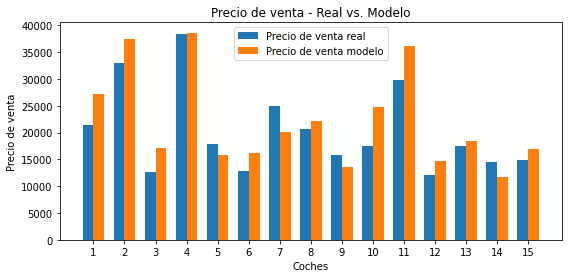

In [ ]:
ind = np.arange(15)
width = 0.35

plt.figure(figsize=(9,4))
plt.bar(ind, y_test[:15], width, label='Precio de venta real')
plt.bar(ind+width, y_pred[:15], width, label='Precio de venta modelo')

plt.xticks(ind+width/2, np.arange(1, 16))
plt.legend(loc='best')

plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Modelo')

plt.show()

## 6.1. Otros modelos

A continuación se pueden costruir otros modelos utilizando algoritmos diferentes.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_val, y_val))
print(model.score(X_test, y_test))

print ("Coeff and intercept:", model.coef_ , model.intercept_)

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = .3)
lasso_model.fit(X_train , y_train)
y_pred = lasso_model.predict(X_test)

print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_val, y_val))
print(lasso_model.score(X_test, y_test))

In [ ]:
from sklearn import svm

svm_model = svm.SVR()
svm_model.fit(X_train , y_train)
y_pred = svm_model.predict(X_test)

print(svm_model.score(X_train, y_train))
print(svm_model.score(X_val, y_val))
print(svm_model.score(X_test, y_test))

In [ ]:
from sklearn import linear_model

bayes_model = linear_model.BayesianRidge()
bayes_model.fit(X_train , y_train)
y_pred = bayes_model.predict(X_test)

print(bayes_model.score(X_train, y_train))
print(bayes_model.score(X_val, y_val))
print(bayes_model.score(X_test, y_test))

In [ ]:
from sklearn import linear_model

lasso_lars_model = linear_model.LassoLars(alpha=.1, normalize=False)
lasso_lars_model.fit(X_train , y_train)
y_pred = lasso_lars_model.predict(X_test)

print(lasso_lars_model.score(X_train, y_train))
print(lasso_lars_model.score(X_val, y_val))
print(lasso_lars_model.score(X_test, y_test))

In [ ]:
from sklearn.linear_model import ARDRegression

ard_model = ARDRegression(compute_score=True)
ard_model.fit(X_train , y_train)
y_pred = ard_model.predict(X_test)

print(ard_model.score(X_train, y_train))
print(ard_model.score(X_val, y_val))
print(ard_model.score(X_test, y_test))

In [ ]:
from sklearn.linear_model import TweedieRegressor
tweed_model = TweedieRegressor(power=1, alpha=0.5, link='log')
tweed_model.fit(X_train , y_train)
y_pred = tweed_model.predict(X_test)

print(tweed_model.score(X_train, y_train))
print(tweed_model.score(X_val, y_val))
print(tweed_model.score(X_test, y_test))

## 6.2 Red neuronal